# 06 - Multinomial Logistic Regression 

We will use the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) dataset, which was built from the recordings of study participants performing activities of daily living (ADL) while carrying a smartphone with an embedded inertial sensor. The objective is to classify activities into one of six activities (walking, walking upstairs, walking downstairs, sitting, standing, and laying) performed.

For each record in the dataset, the following is provided: 

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration. 
- Triaxial angular velocity from the gyroscope. 
- A 561-feature vector with time and frequency domain variables. 
- Its activity label (given as a string).

More information about the features is available on the website above.

In [1]:
import os, seaborn as sns, pandas as pd, numpy as np

## Task 1 - Load and Examine Dataset

Import the data and do the following:

* Examine the data types--there are many columns, so it might be wise to use the method **value_counts()**.
* Determine if any of the given features  (floating point values) need to be scaled
* Examine how balanced are the diferent *activities- the dependent vatiable, target* represented in the dataset
* Encode the activity label as an integer

In [2]:
from pathlib import Path
import os

data_dir = str(Path.home()) + r'/coursematerial/GIS/GeoDataScience'

filepath = os.path.join(data_dir, r'HumanActivityWithSmartphones.csv')

print(filepath)

/home/jovyan/coursematerial/GIS/GeoDataScience/HumanActivityWithSmartphones.csv


In [3]:
### READ THE DATA
data = pd.read_csv(filepath, sep=',')
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [4]:
print(data.columns)


Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'Activity'],
      dtype='object', length=562)


In [5]:
print(f'There are {len(data.columns)} variables')


There are 562 variables


The data columns are all floats except for the activity label. The method **value_counts()** gives for a series object the number of unique values, which are in the following applied on the data types (dtypes).

In [6]:
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

Give out the last few columns.

In [7]:
data.dtypes.tail()


angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

The data are all scaled from -1 (minimum) to 1.0 (maximum), which can be verified by taking the value counts from the minimum of all columns.

In [8]:
data.iloc[:, :-1].min().value_counts()

-1.0    561
dtype: int64

And the maximum of all columns.

In [9]:
data.iloc[:, :-1].max().value_counts()

1.0    561
dtype: int64

Examine the number of times the activities are represented in the dataset.

In [10]:
data.Activity.value_counts()


LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

**Encoding the labels**

Scikit-learn classifiers do not accept the labels as they are given (as strings) for the prediction column. Thus, the class `LabelEncoder` needs to be used to convert the activity labels to integers. Use `LabelEncoder` **to fit_transform()** the "Activity" column, and check your result for 5 random values with the **sample()** method.

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].sample(5)

6884    0
7670    2
6156    0
6443    5
3232    5
Name: Activity, dtype: int64

The attribute **classes_** gives us the labels (classes) in the order they were labeled.

In [12]:
le.classes_

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

## Task 2 - Exploratory Data Analysis

* Calculate the correlations between the dependent variables.
* Create a histogram of the correlation values
* Identify those that are most correlated (either positively or negatively).

In [13]:
# Calculate the correlation values
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()
corr_values

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-mean()-X,1.000000,0.128037,-0.230302,0.004590,-0.016785,-0.036071,0.010303,-0.017488,-0.038805,0.046943,...,0.029901,-0.006179,-0.002255,-0.552989,0.015754,0.036047,0.034296,-0.041021,0.034053,0.030656
tBodyAcc-mean()-Y,0.128037,1.000000,-0.029882,-0.046352,-0.046996,-0.054153,-0.045247,-0.047673,-0.055524,-0.039445,...,-0.014402,-0.000649,-0.002842,0.077750,-0.027567,0.013241,0.077627,-0.007513,-0.005616,-0.016233
tBodyAcc-mean()-Z,-0.230302,-0.029882,1.000000,-0.024185,-0.023745,-0.015632,-0.022872,-0.022966,-0.009577,-0.040218,...,-0.015358,0.023050,0.023122,0.055020,-0.042083,-0.066233,-0.030748,0.003215,-0.012986,-0.028406
tBodyAcc-std()-X,0.004590,-0.046352,-0.024185,1.000000,0.922525,0.861910,0.998662,0.916087,0.856497,0.981226,...,-0.068807,0.165552,0.135171,-0.034334,-0.017096,0.027464,-0.027123,-0.374104,0.449425,0.393063
tBodyAcc-std()-Y,-0.016785,-0.046996,-0.023745,0.922525,1.000000,0.888259,0.918561,0.997510,0.887052,0.911137,...,-0.109941,0.220279,0.191164,-0.020806,-0.006605,0.001902,-0.015784,-0.381391,0.506106,0.425511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",0.036047,0.013241,-0.066233,0.027464,0.001902,-0.004984,0.027729,-0.002924,-0.009873,0.033533,...,-0.029273,0.042123,0.035684,-0.013009,0.010679,1.000000,-0.112454,-0.007095,-0.006444,-0.015380
"angle(tBodyGyroJerkMean,gravityMean)",0.034296,0.077627,-0.030748,-0.027123,-0.015784,-0.012196,-0.027097,-0.013411,-0.012800,-0.030908,...,-0.002618,-0.013065,-0.011829,-0.027478,0.023605,-0.112454,1.000000,0.024822,-0.004582,-0.012549
"angle(X,gravityMean)",-0.041021,-0.007513,0.003215,-0.374104,-0.381391,-0.353271,-0.371168,-0.378013,-0.355836,-0.384244,...,0.087571,-0.085226,-0.081971,0.008050,0.017534,-0.007095,0.024822,1.000000,-0.748249,-0.635231
"angle(Y,gravityMean)",0.034053,-0.005616,-0.012986,0.449425,0.506106,0.459092,0.444926,0.507947,0.460345,0.458832,...,-0.105752,0.087671,0.078010,0.003082,-0.007256,-0.006444,-0.004582,-0.748249,1.000000,0.545614


As you already know, and which can be also be seen from above, the correlatin matrix is symetric with regard to diagonal, so half of the values bring no additional info. Simplify the datza by emptying all the data elements below the diagonol.

In [14]:
# Get all the indices for the lower elements under the diagonal
tril_index = np.tril_indices_from(corr_values)
tril_index

(array([  0,   1,   1, ..., 560, 560, 560]),
 array([  0,   0,   1, ..., 558, 559, 560]))

Copy the array and set all indices below the diagonal to NaN.

In [15]:
corr_array = np.array(corr_values)
corr_array[np.tril_indices_from(corr_values)] = np.nan

Construct a data frame from this new data.

In [16]:
corr_values = pd.DataFrame(corr_array, columns= corr_values.columns, index=corr_values.index )

Stack the data, convert it to a data frame, reset the index, and rename the columns.

In [17]:
corr_values = (corr_values
.stack()
.to_frame()
.reset_index()
.rename(columns={'level_0':'feature1',
'level_1':'feature2',
0:'correlation'}))
# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

Plot a histogram of the absolute value correlations.

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

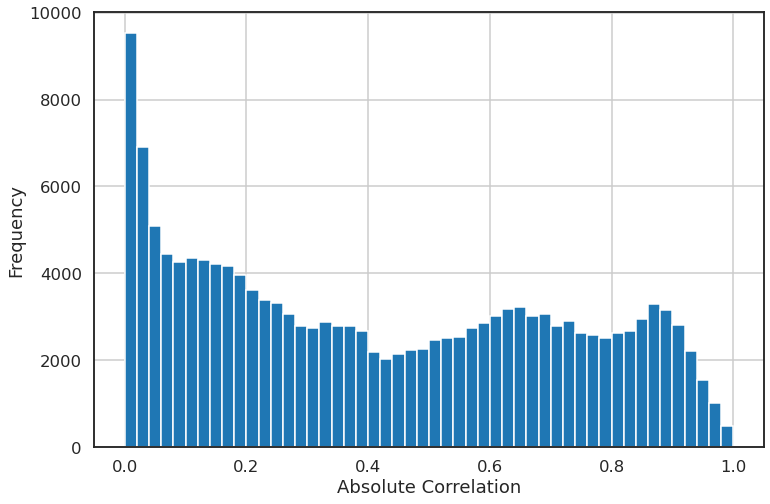

In [19]:
sns.set_context('talk')
sns.set_style('white')
ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

Print the most highly correlated values.

In [20]:
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

,feature1,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


## Task 3 - Pre-process data

* Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's [StratifiedShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) to maintain the same ratio of predictor classes.
* Regardless of methods used to split the data, compare the ratio of classes in both the train and test splits.


In [21]:
from sklearn.model_selection import StratifiedShuffleSplit
# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1,
test_size=0.3,
random_state=42)

In [22]:
train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))
# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']
X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'Activity']


In [23]:
y_train.value_counts(normalize=True)


0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [24]:
y_test.value_counts(normalize=True)


0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

It looks like all classes are well approximately and in the same ratio in train and test.

## Task 4 - Multinomial Regression Model

* Fit a multinomial logistic regression model without any regularization using all of the features. Be sure to read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#sklearn.linear_model.LogisticRegression) about fitting a *multi-class model* so you understand the coefficient output. **Hint:** Please read carefully the documentation explaining the _solver_ parameter which is the algorithm used for optimization/training the model. (For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.) Store the model.

(Feel free to test out several optimizer.)

In [25]:
from sklearn.linear_model import LogisticRegression
# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

## Task 5 - Prediction

* Predict and store the class for each model for the test data.
* Store the probability for the predicted class for each model. 

In [26]:
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test).max(axis=1)

Print the predicted classes.

In [27]:
y_pred

array([3, 5, 3, ..., 1, 1, 5])

And their probabilities for these classes.

In [28]:
y_prob


array([0.99893879, 0.98816547, 0.98759164, ..., 0.96964188, 0.98684026,
       0.98985376])

At least for these values, the model seems to be very confident in the predictions.

## Task 6 - Evaluation Metrics

For each model, calculate the following error metrics: 

* Accuracy
* Precision
* Recall
* F-score
* Confusion Matrix

Decide how to combine the multi-class metrics into a single value for each model. 

In [29]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize
metrics = list()
precision, recall, fscore, _ = score(y_test, y_pred, average='weighted')
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
metrics.append(pd.Series({'precision':precision, 'recall':recall,
'fscore':fscore, 'accuracy':accuracy}))
metrics

[precision    0.984144
 recall       0.984142
 fscore       0.984143
 accuracy     0.984142
 dtype: float64]

Give out the confusion matrix, which is best done with a DataFrame for nicer formatting. 

The confusion matrix tells us how many instances of a known (true) class, given in the row i, is predicted as an instance of a class given in the column j. The number of correct predictions are given in the diagonal.

For example, the 572 instances that are known to be standing, are given in the 3rd row (labeled standing). The first column tells us how many times it was predicted to be laying, the second column how many times it was predicted as sitting, etc.

In [30]:
pd.DataFrame(cm, index=le.classes_, columns=le.classes_)

,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
LAYING,583,0,0,0,0,0
SITTING,0,512,21,0,0,0
STANDING,0,22,550,0,0,0
WALKING,0,0,0,515,1,1
WALKING_DOWNSTAIRS,0,0,0,1,420,1
WALKING_UPSTAIRS,0,0,0,1,1,461


Scikit-learn also has a nice classification report that provides precision, recall, f1-score, accuracy, etc.

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=le.classes_))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       583
           SITTING       0.96      0.96      0.96       533
          STANDING       0.96      0.96      0.96       572
           WALKING       1.00      1.00      1.00       517
WALKING_DOWNSTAIRS       1.00      1.00      1.00       422
  WALKING_UPSTAIRS       1.00      1.00      1.00       463

          accuracy                           0.98      3090
         macro avg       0.98      0.98      0.98      3090
      weighted avg       0.98      0.98      0.98      3090



In [33]:
y_pred.shape

(3090,)